# Making a trial by trial fit of faceWord dataand using that for searchligth classificiation

This tutorial will load models and data from tutorial 13 and change the design matrix to one that gives a beta estimate for each trial.

In [1]:
# import some functionality
from datetime import datetime

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))
import os
import pip
os.system('python -m pip install numpy')
os.system('python -m pip install matplotlib')
os.system('python -m pip install scipy')
os.system('python -m pip install panda')
os.system('python -m pip install nilearn')
os.system('python -m pip install sklearn')
os.system('python -m pip install pickle')
os.system('python -m pip install atlasreader')
os.system('python -m pip install seaborn')

#import os.path as op
import numpy as np
#from numpy.linalg import inv
#import nibabel as nib
import matplotlib.pyplot as plt
#from scipy.ndimage import gaussian_filter

%matplotlib inline

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 00:02:32
Finishing cell: 00:02:46


In [2]:
import pickle

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

# Getting the first level models from tutorial 13:
f = open('/work/74470/WordFace_first_level_models.pkl', 'rb')
models, models_run_imgs, models_events, models_confounds = pickle.load(f)
f.close()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 00:02:46


/opt/conda/lib/python3.10/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


Finishing cell: 00:02:52


### Figuring out what is in the models_events variable

In [3]:
#print(models_events[0])
print(models_confounds[21][0].shape)
ons=models_events[21][0]['onset']

for ii in range(len(models_events[21])):
    print(models_events[21][ii])
    
now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

(610, 22)
          onset  duration trial_type
0      4.691391  0.686271  image_pos
1     14.690868  0.686778  image_pos
2     27.291907  0.686213  image_pos
3     34.689335  0.689300  image_neg
4     47.289406  0.689726  image_neg
..          ...       ...        ...
115  551.021451  0.698145   word_pos
116  561.022866  0.697057   word_neu
117  571.023591  0.696643   word_pos
118  581.023435  0.697495   word_neg
119  591.023802  0.697703   word_neu

[120 rows x 3 columns]
          onset  duration trial_type
0      7.284404  0.686903  image_neg
1     17.282179  0.689050  image_neg
2     27.285705  0.686029  image_pos
3     34.683512  0.689048  image_pos
4     44.682853  0.689986  image_neg
..          ...       ...        ...
115  551.015469  0.697586   word_neu
116  561.015639  0.697611   word_neu
117  571.016164  0.697805   word_pos
118  581.016698  0.697766   word_pos
119  591.017763  0.696802   word_pos

[120 rows x 3 columns]
          onset  duration trial_type
0      4.688930  

## Creating new design matrices with a column per experimental trial.

In [4]:
import pandas as pd
from nilearn.glm.first_level import make_first_level_design_matrix
import numpy as np
lsa_dm=[]

for ii in range(len(models_events[21])):
    #print(models_events[0][ii])
    #N=number of events
    N=models_events[21][ii].shape[0]
    t_fmri = np.linspace(0, 610,610,endpoint=False)
    # We have to create a dataframe with onsets/durations/trial_types
    # No need for modulation!
    trials = pd.DataFrame(models_events[21][ii], columns=['onset'])
    trials.loc[:, 'duration'] = 0.7
    trials.loc[:, 'trial_type'] = ['t_'+str(i).zfill(3) + '_' + models_events[21][ii]['trial_type'][i-1]  for i in range(1, N+1)]

    # lsa_dm = least squares all design matrix
    lsa_dm.append(make_first_level_design_matrix(
        frame_times=t_fmri,  # we defined this earlier 
        events=trials,
        add_regs=models_confounds[21][ii], #Add the confounds from fmriprep
        hrf_model='glover',
        drift_model='cosine'  
    ))
    




now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Finishing cell: 00:02:58


In [5]:
models_events[21]

[          onset  duration trial_type
 0      4.691391  0.686271  image_pos
 1     14.690868  0.686778  image_pos
 2     27.291907  0.686213  image_pos
 3     34.689335  0.689300  image_neg
 4     47.289406  0.689726  image_neg
 ..          ...       ...        ...
 115  551.021451  0.698145   word_pos
 116  561.022866  0.697057   word_neu
 117  571.023591  0.696643   word_pos
 118  581.023435  0.697495   word_neg
 119  591.023802  0.697703   word_neu
 
 [120 rows x 3 columns],
           onset  duration trial_type
 0      7.284404  0.686903  image_neg
 1     17.282179  0.689050  image_neg
 2     27.285705  0.686029  image_pos
 3     34.683512  0.689048  image_pos
 4     44.682853  0.689986  image_neg
 ..          ...       ...        ...
 115  551.015469  0.697586   word_neu
 116  561.015639  0.697611   word_neu
 117  571.016164  0.697805   word_pos
 118  581.016698  0.697766   word_pos
 119  591.017763  0.696802   word_pos
 
 [120 rows x 3 columns],
           onset  duration trial_t

### Check out the created design matrix
Note that the index represents the frame times

In [6]:
print(lsa_dm[0])

       t_001_image_pos  t_002_image_pos  t_003_image_pos  t_004_image_neg  \
0.0                0.0              0.0              0.0              0.0   
1.0                0.0              0.0              0.0              0.0   
2.0                0.0              0.0              0.0              0.0   
3.0                0.0              0.0              0.0              0.0   
4.0                0.0              0.0              0.0              0.0   
...                ...              ...              ...              ...   
605.0              0.0              0.0              0.0              0.0   
606.0              0.0              0.0              0.0              0.0   
607.0              0.0              0.0              0.0              0.0   
608.0              0.0              0.0              0.0              0.0   
609.0              0.0              0.0              0.0              0.0   

       t_005_image_neg  t_006_image_neg  t_007_image_pos  t_008_image_pos  

## Plot the new design matrices

Finishing cell: 00:03:04


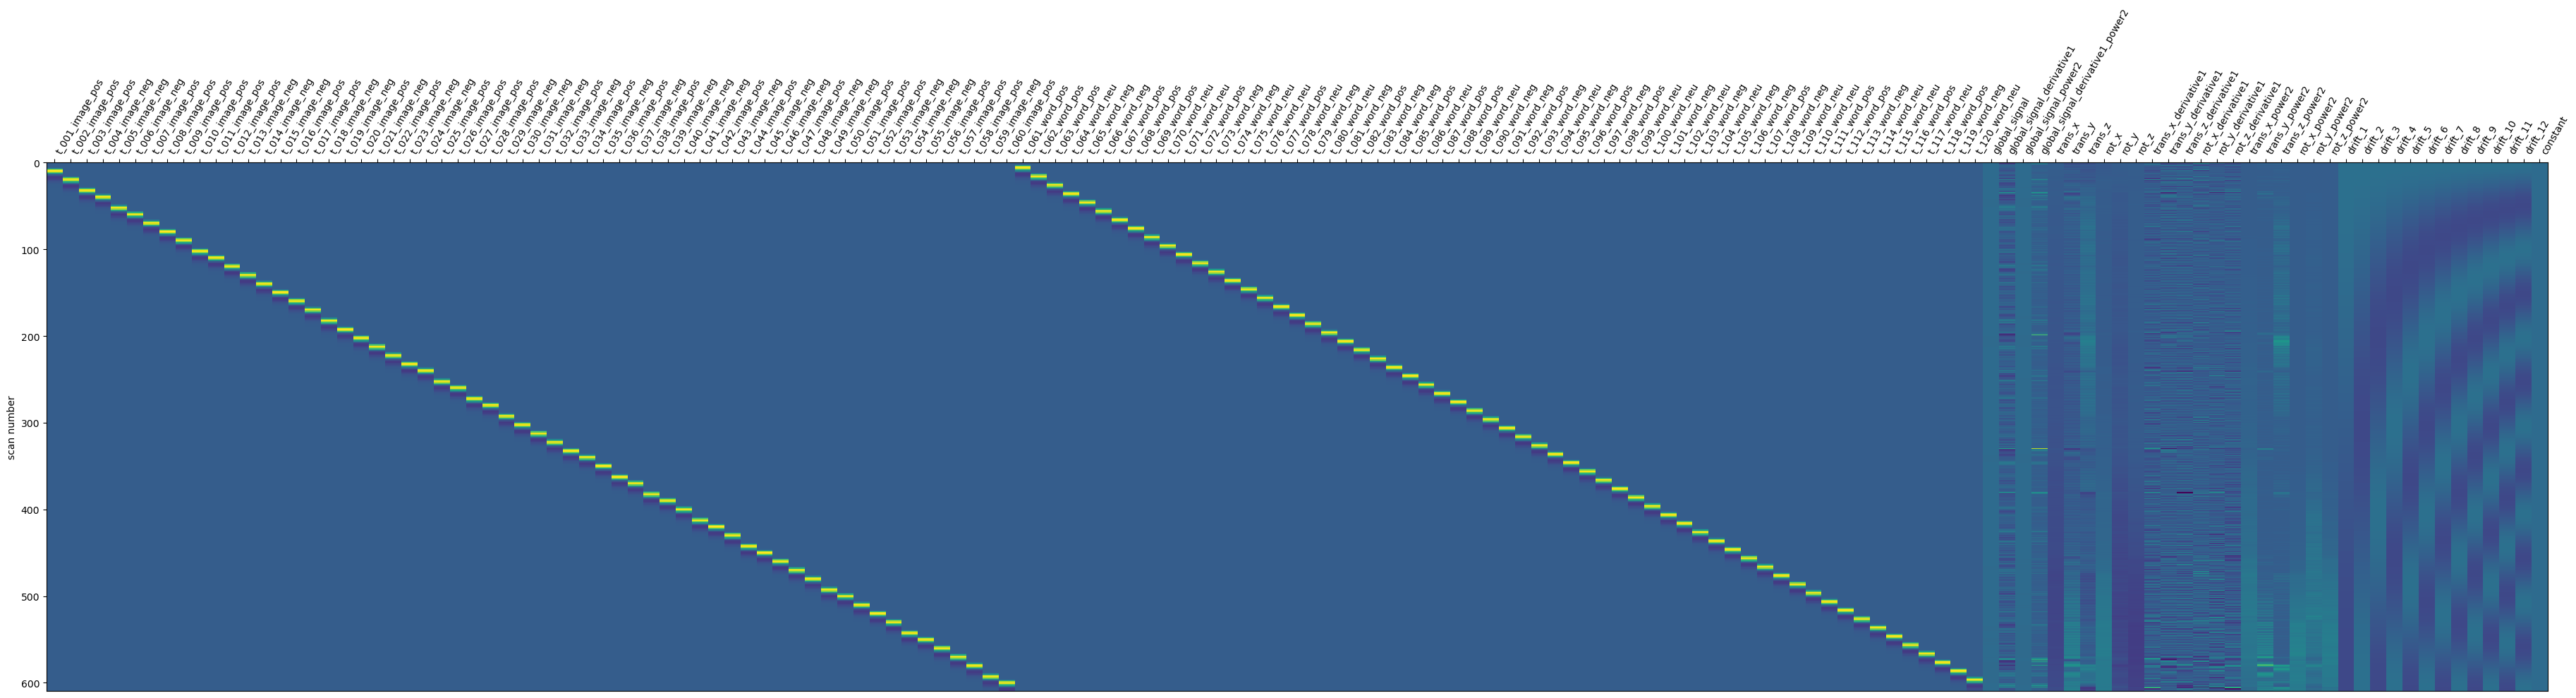

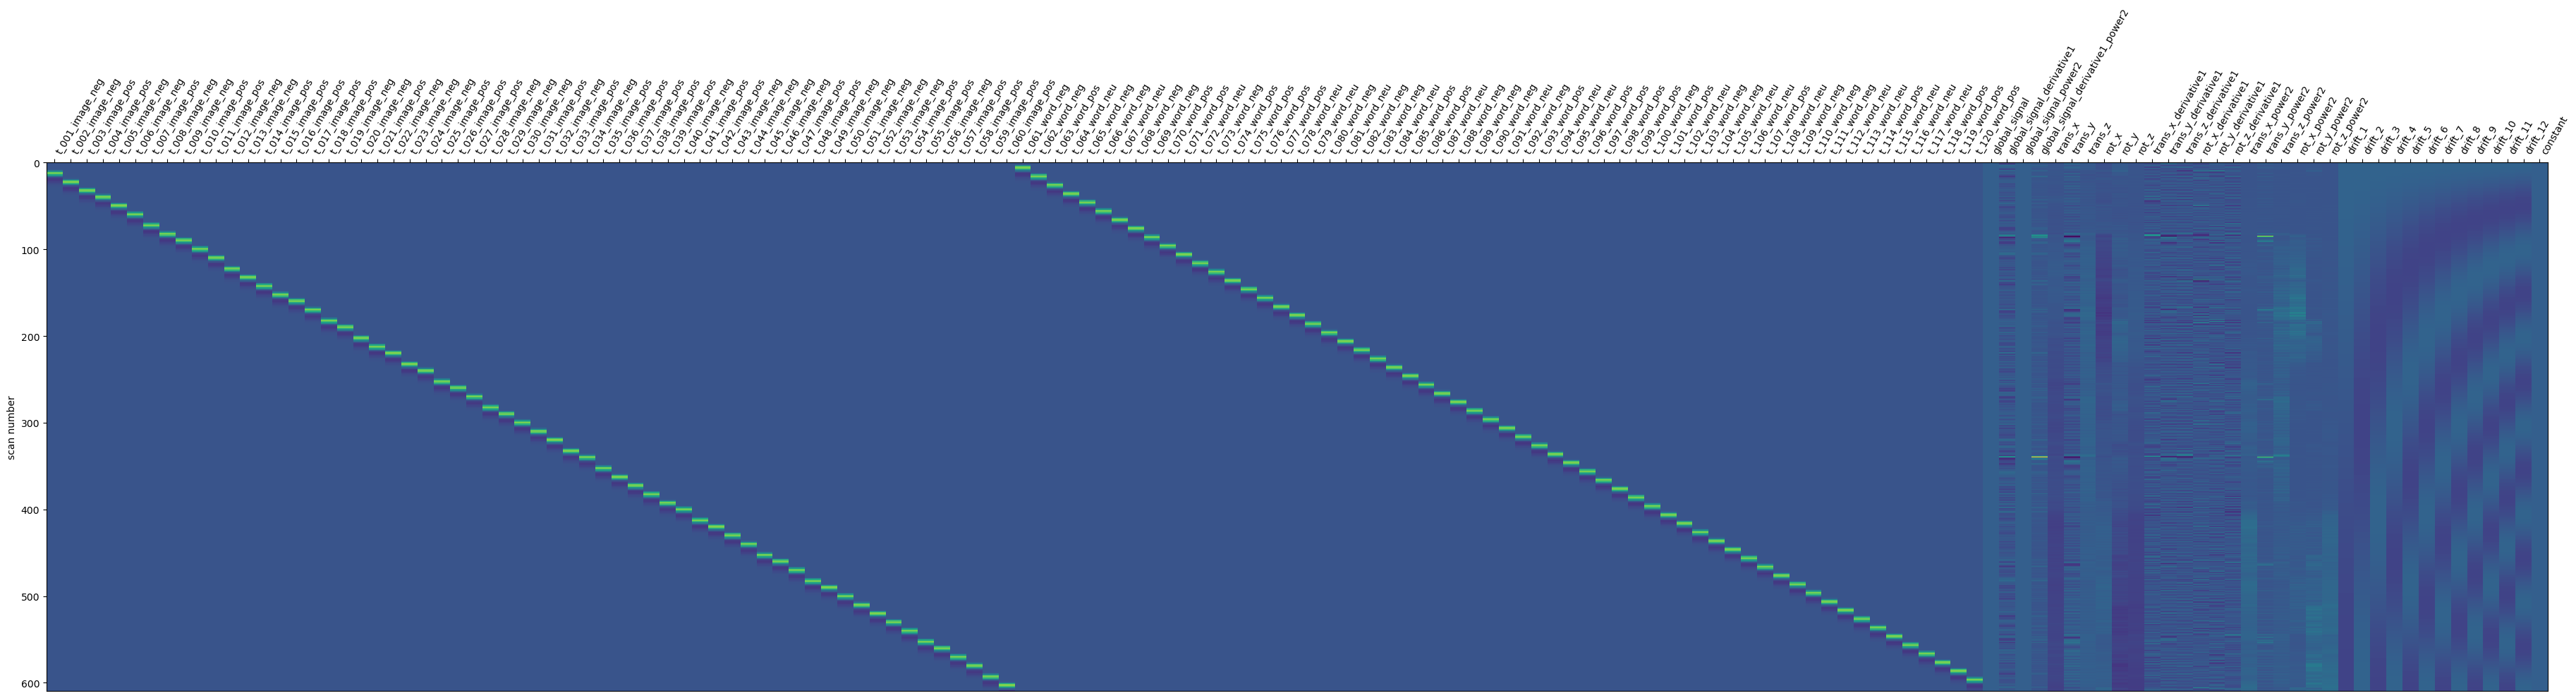

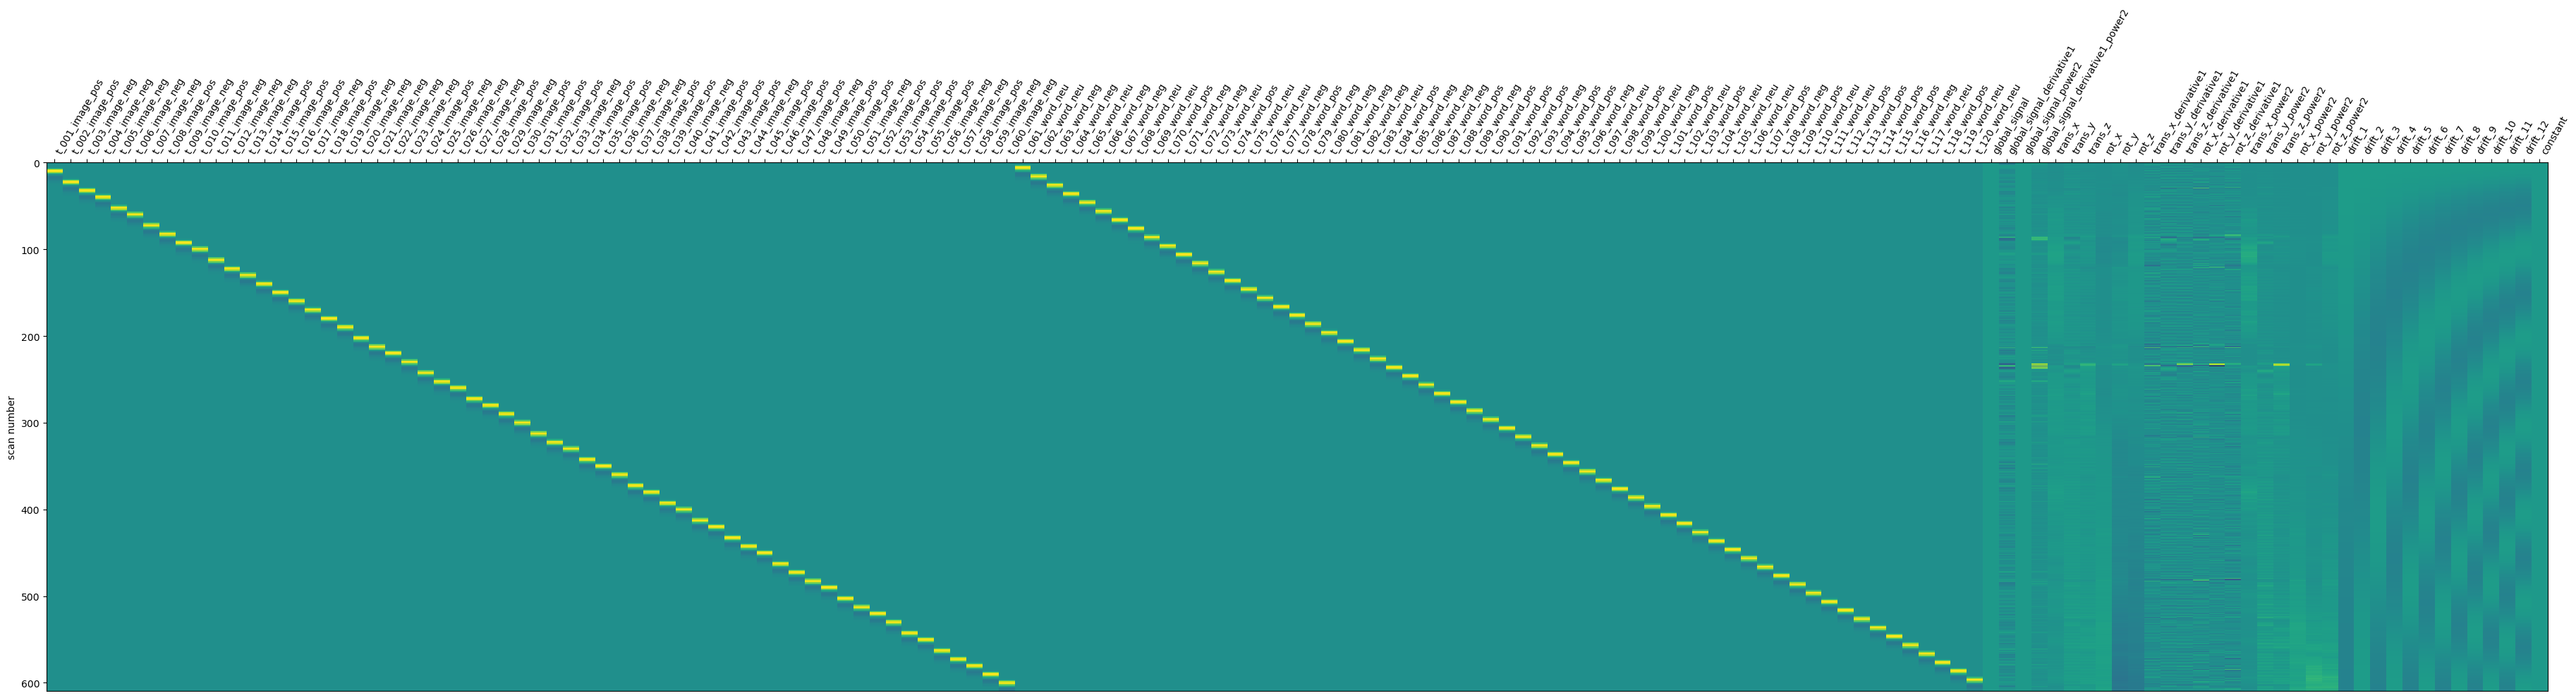

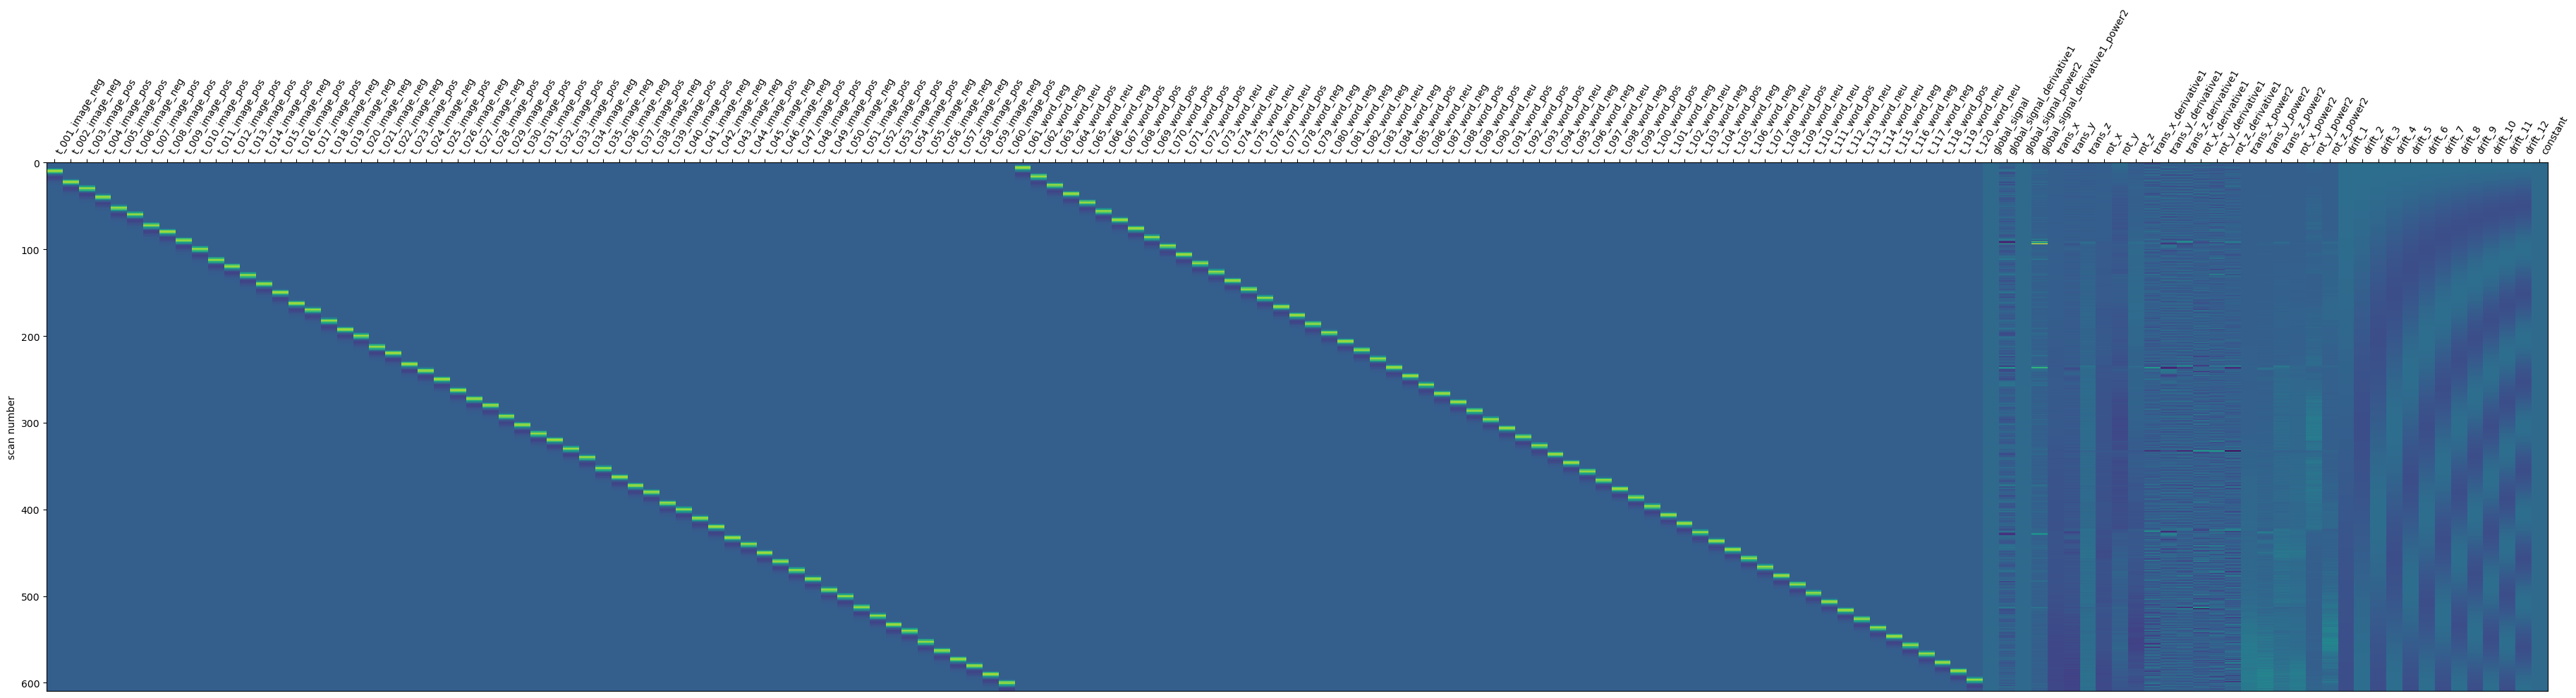

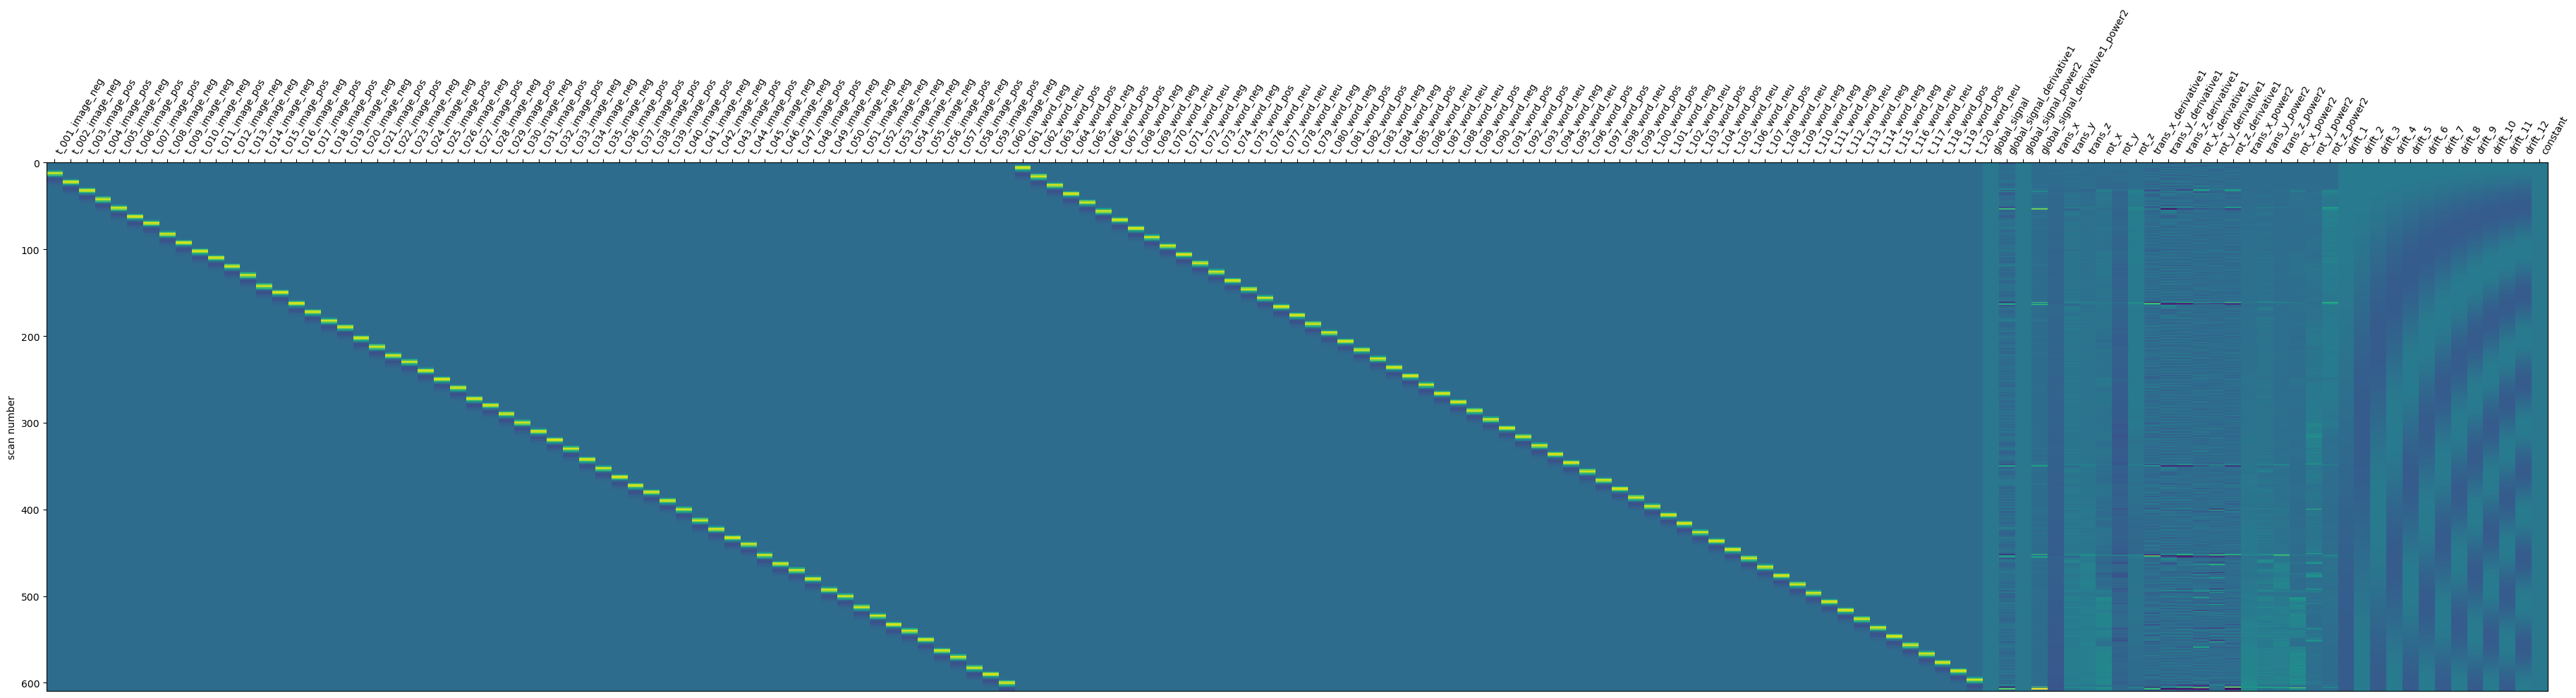

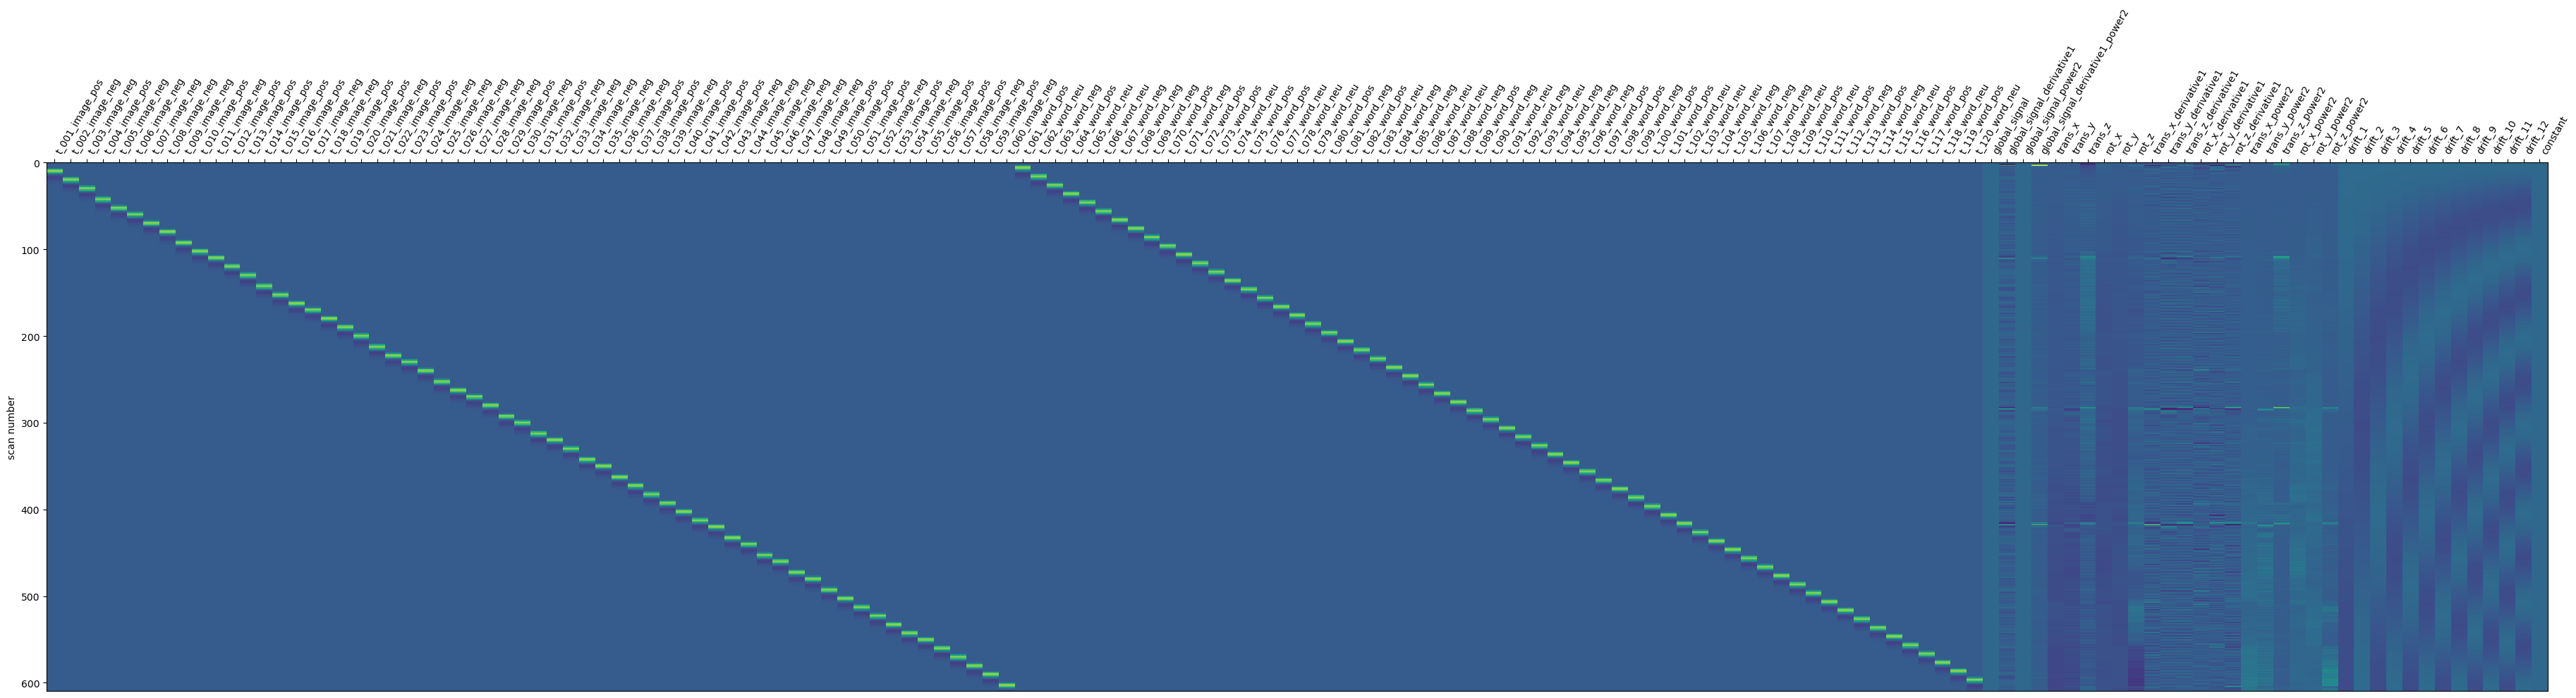

In [7]:
from nilearn.plotting import plot_design_matrix
for ii in range(len(models_events[21])):
    plot_design_matrix(lsa_dm[ii]);

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

### Let's inspect the correlational structure of the design matrix

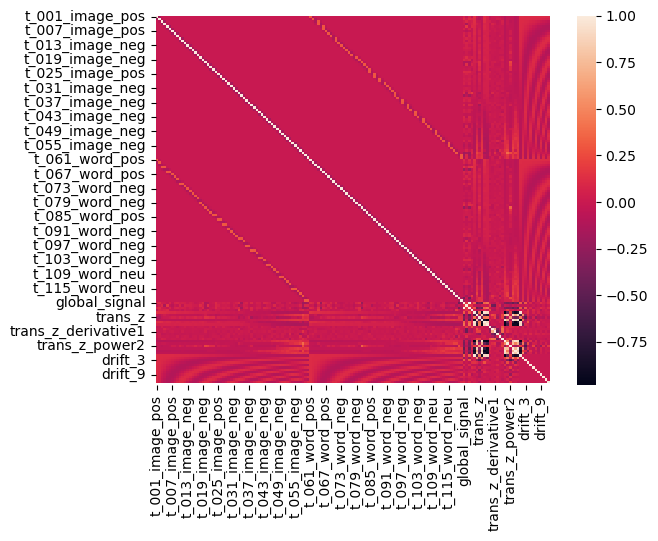

In [8]:
import seaborn as sns
dm_corr=lsa_dm[0].corr()
p1 = sns.heatmap(dm_corr)

## Fit the models for all sessions from one participant

In [9]:

from nilearn.glm.first_level import FirstLevelModel

model1=[]
for ii in range(len(models_events[21])):
    
    # Get data and model info for 1st participant, 1st session
    imgs1=models_run_imgs[21][ii]
    model1.append (FirstLevelModel())
    #Fit the model
    print('Fitting a GLM')
    model1[ii].fit(imgs1,design_matrices=lsa_dm[ii])

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Fitting a GLM
Fitting a GLM
Fitting a GLM
Fitting a GLM


/opt/conda/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:64: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'


Fitting a GLM
Fitting a GLM
Finishing cell: 00:12:08


## Saving/retrieving the fitted models and design matrices

In [10]:
import pickle

# Saving the objects:
f = open('/work/MikkelWallentin#6287/WordFace_first_level_models_all_trials.pkl', 'wb')
pickle.dump([model1, lsa_dm], f)
f.close()

## Getting back the objects:
#f = open('/work/MikkelWallentin#6287/WordFace_first_level_models_all_trials.pkl', 'rb')
#model1, lsa_dm = pickle.load(f)
#f.close()

#print(model1[0])
#now = datetime.now()
#print('Finishing cell:',now.strftime("%H:%M:%S"))

## Making z-map contrasts from the fitted model to use in later analyses

In [25]:

z_maps = []
conditions_label = []

for ii in range(len(models_events[21])):
    N=models_events[21][ii].shape[0]
    #Make an identity matrix with N= number of trials
    contrasts=np.eye(N)
    print(contrasts.shape)
    #Find difference between columns in design matrix and number of trials
    dif=lsa_dm[ii].shape[1]-contrasts.shape[1]
    print(dif)
    #Pad with zeros
    contrasts=np.pad(contrasts, ((0,0),(0,dif)),'constant')
    print(contrasts.shape)
    for i in range(N):
        #Add a z-contrast image from each trial
        z_maps.append(model1[ii].compute_contrast(contrasts[i,], output_type='z_score'))
        # Make a variable with condition labels for use in later classification
        conditions_label.append(models_events[21][ii]['trial_type'][i])
#        session_label.append(session)

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

(120, 120)
35
(120, 155)
(120, 120)
35
(120, 155)
(120, 120)
35
(120, 155)
(120, 120)
35
(120, 155)
(120, 120)
35
(120, 155)
(120, 120)
35
(120, 155)
Finishing cell: 10:50:36


## Saving models and z_maps

In [26]:
import pickle

#Save the first level models

# Saving the objects:
f = open('/work/MikkelWallentin#6287/WordFace_first_level_models_all_trials.pkl', 'wb')
pickle.dump([model1, lsa_dm, conditions_label, z_maps], f)
f.close()

# Getting back the objects:
#f = open('store.pckl', 'rb')
#model1, lsa_dm, conditions_label, z_maps = pickle.load(f)
#f.close()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Finishing cell: 10:50:40


## Reshape data for classification

In [27]:

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

import numpy as np
#from nilearn import datasets
from nilearn.image import new_img_like, load_img, index_img, clean_img
from sklearn.model_selection import train_test_split, GroupKFold
n_trials=len(conditions_label)
print(n_trials)


# Reshaping data------------------------------
from nilearn.image import index_img, concat_imgs
idx_neg=[int(i) for i in range(len(conditions_label)) if conditions_label[i]=='image_neg']
idx_pos=[int(i) for i in range(len(conditions_label)) if conditions_label[i]=='image_pos']

#Concatenate trials
idx=np.concatenate((idx_neg, idx_pos))
print(idx)

conditions=np.array(conditions_label)[idx]
z_maps_conc=concat_imgs(z_maps)
print(z_maps_conc.shape)
z_maps_img = index_img(z_maps_conc, idx)

print(z_maps_img.shape)


Starting cell: 10:50:40
720
[  3   4   5  12  13  14  17  18  20  22  23  28  29  30  32  34  36  38
  39  40  42  44  45  47  48  52  53  54  58 120 121 124 125 127 128 131
 132 138 139 141 142 143 147 148 149 151 153 159 162 163 164 165 168 169
 170 171 172 175 242 243 244 245 246 248 250 251 252 256 258 259 260 261
 262 264 265 266 268 272 275 276 279 283 287 290 295 296 298 299 360 361
 365 374 377 378 379 380 381 383 385 386 393 394 395 397 400 401 402 404
 405 409 414 415 416 418 480 481 484 487 488 489 491 492 493 495 498 499
 502 503 505 507 509 512 513 514 520 521 524 525 528 529 530 531 532 533
 534 536 539 601 602 604 605 606 607 608 610 616 617 620 623 624 625 626
 627 629 631 632 633 634 635 638 642 643 644 645 646 647 651 653 657 659
   0   1   2   6   7   8   9  10  11  15  16  19  21  24  25  26  27  31
  33  35  37  41  43  46  49  50  51  55  56  57  59 122 123 126 129 130
 133 134 135 136 137 140 144 145 146 150 152 154 155 156 157 158 160 161
 166 167 173 174 176 17

## create training and testing vars on the basis of class labels

In [28]:
now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))
#conditions_img=conditions[idx]
#print(conditions_img)
#Make an index for spliting fMRI data with same size as class labels
idx2=np.arange(conditions.shape[0])

# create training and testing vars on the basis of class labels
idx1,idx2, conditions1,  conditions2 = train_test_split(idx2,conditions, test_size=0.2)
print(idx1, idx2)

# Reshaping data------------------------------
from nilearn.image import index_img
fmri_img1 = index_img(z_maps_img, idx1)
fmri_img2 = index_img(z_maps_img, idx2)
#Check data sizes
print(fmri_img1.shape)
print(fmri_img2.shape)

Starting cell: 10:50:42
[  2 128  48 201  11 297 238  44 210 174 164 355  36 252 208  18  31  67
 298 104 202 162 345 311 293 286 217   3 341 283 307 263  56  50 108 272
 148 242 207  22  59  68 219 339  49  47  54 299  60 107  99 181 188  33
 275 170 332 326 259 229 303 334 178  34 120 204 223 216  88  17 138 213
 168 335 130 190  73  65 316 145  61  69 243 327  46  95 236 318  86 146
 100 282 309  58 226  42 167  25 271 155 151 234 301  39  82 137 123  23
 310 172 352 184 173  94 257 105  55 194 337 304  19  13   9 232 197  79
   1 265 262 357 142 358 161 199  70 195 122 284 305 354  90  85 315 260
  63 244 289 221  40 158 359 256  28 340 203 209 109 245 156  14 328   7
 267 247 322 237  83 225 115 119   4 338  72 134  87 200 177 111 143 279
 139 163 198 113  24 126 321  93  78 249 110  26 330 239 171  10 118 228
 294 333 292 215  64  30   5 153  32  52 313 290 141 348  57 179  43 196
 336 124  62 102 144 193 253 300 112 276 258 169 288 186 211 182  53 106
 231  29 176 281 269 152  9

## Prepare a searchlight analysis on the first split

Starting cell: 21:58:18


/tmp/ipykernel_5580/1132737762.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  process_mask = mask_img.get_fdata().astype(np.int)
/tmp/ipykernel_5580/1132737762.py:27: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  process_mask_img = new_img_like(mask_img, process_mask)


Finishing cell: 21:58:21


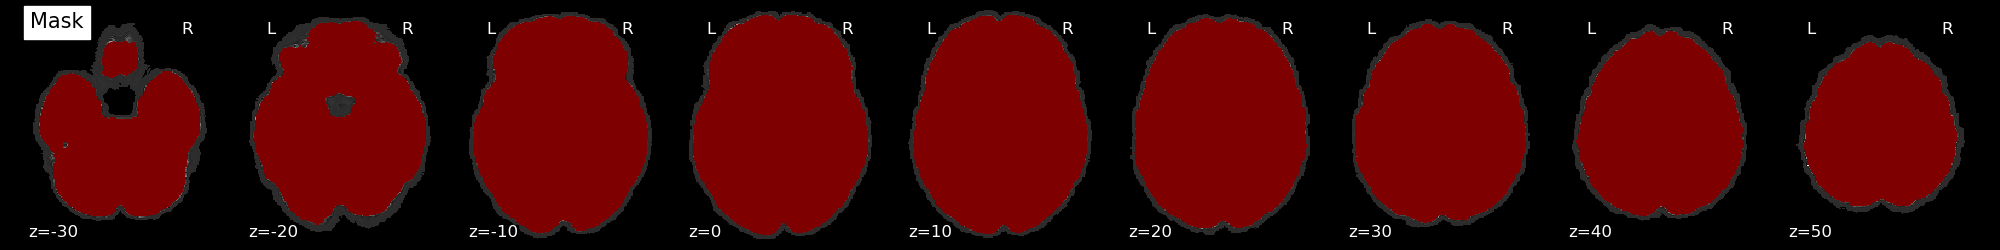

In [51]:
now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))
# -------------------
import pandas as pd
import numpy as np
from nilearn.image import new_img_like, load_img
from nilearn.plotting import plot_stat_map, plot_img, show
from nilearn import decoding
from nilearn.decoding import SearchLight
from sklearn import naive_bayes, model_selection #import GaussianNB

#########################################################################
#Make a mask with only 10 slices

mask_wb_filename='/work/82777/BIDS/derivatives/sub-0096/anat/sub-0096_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
anat_filename='/work/82777/BIDS/derivatives/sub-0096/anat/sub-0096_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
#Load the whole brain mask
mask_img = load_img(mask_wb_filename)


# .astype() makes a copy.
process_mask = mask_img.get_fdata().astype(np.int)
#Set slices below x in the z-dimension to zero (in voxel space)
process_mask[..., :40] = 0
#Set slices above x in the z-dimension to zero (in voxel space)
process_mask[..., 150:] = 0
process_mask_img = new_img_like(mask_img, process_mask)


#Plot the searchlight scores on an anatomical background
plot_img(process_mask_img, bg_img=anat_filename,#bg_img=mean_fmri,
         title="Mask", display_mode="z",cut_coords=[-30,-20,-10,0,10,20,30,40,50],
         vmin=.40, cmap='jet', threshold=0.9, black_bg=True)
#########################################################################


#########################################################################

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

## Run the searchlight analysis

In [30]:
now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))
#n_jobs=-1 means that all CPUs will be used

from nilearn.decoding import SearchLight
from sklearn.svm import LinearSVC

# The radius is the one of the Searchlight sphere that will scan the volume
searchlight = SearchLight(
    mask_img,
    estimator=LinearSVC(penalty='l2'),
    process_mask_img=process_mask_img,
    radius=5, n_jobs=-1,
    verbose=10, cv=10)
searchlight.fit(fmri_img1, conditions1)

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 10:50:45


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  16 | elapsed: 457.6min remaining: 1983.1min
[Parallel(n_jobs=-1)]: Done   5 out of  16 | elapsed: 466.5min remaining: 1026.3min
[Parallel(n_jobs=-1)]: Done   7 out of  16 | elapsed: 467.3min remaining: 600.8min
[Parallel(n_jobs=-1)]: Done   9 out of  16 | elapsed: 469.8min remaining: 365.4min
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed: 474.0min remaining: 215.5min
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed: 479.4min remaining: 110.6min
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed: 486.2min finished


Finishing cell: 20:36:24


## Save/restore the variables

In [67]:
import pickle
import nilearn

#Save the first level models

# Saving the objects:
#f = open('/work/MikkelWallentin#6287/WordFace_first_level_models_all_trials_searchlight.pkl', 'wb')
#pickle.dump([searchlight], f)
#f.close()

# Getting back the objects:
f = open('/work/82777/WordFace_searchlight_12.pkl', 'rb')
searchlight = pickle.load(f)
f.close()

print(searchlight)
#now = datetime.now()
#print('Finishing cell:',now.strftime("%H:%M:%S"))
hest=2
for x in range(hest-1,6):
    print(x)

SearchLight(cv=10, estimator=LinearSVC(dual='auto', max_iter=2000),
            mask_img=<nibabel.nifti1.Nifti1Image object at 0x7f7492f499f0>,
            n_jobs=-1,
            process_mask_img=<nibabel.nifti1.Nifti1Image object at 0x7f74952e2350>,
            radius=5, verbose=10)
1
2
3
4
5


## Plot the outcome of the searchlight analysis

NameError: name 'plt' is not defined

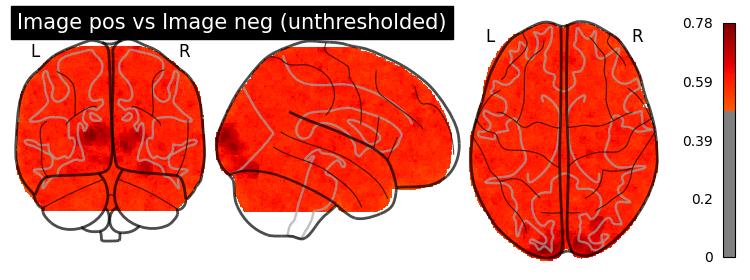

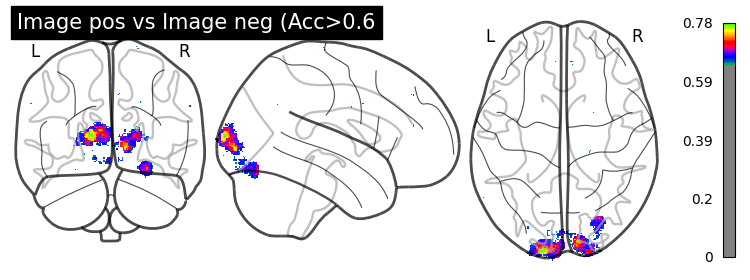

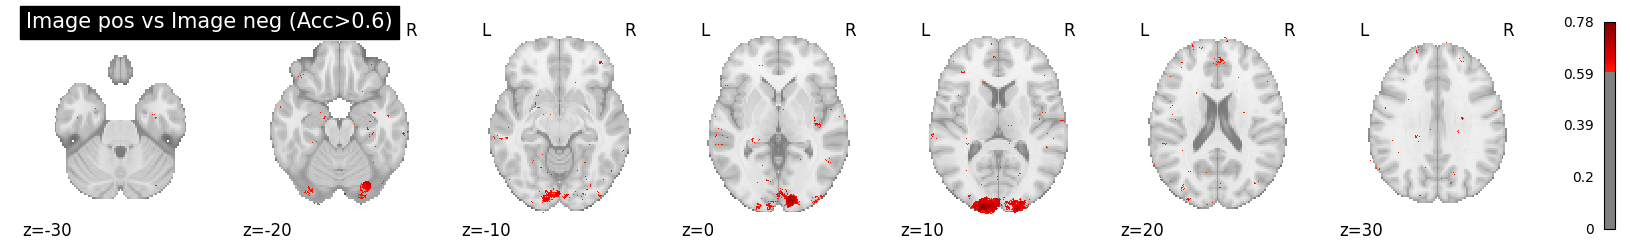

In [62]:
from nilearn.plotting import plot_glass_brain, plot_stat_map
from nilearn.image import new_img_like, load_img
mask_wb_filename='/work/82777/BIDS/derivatives/sub-0054/anat/sub-0054_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
anat_filename='/work/82777/BIDS/derivatives/sub-0054/anat/sub-0054_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'


#Create an image of the searchlight scores
searchlight_img = new_img_like(anat_filename, searchlight.scores_)


plot_glass_brain(searchlight_img, cmap='jet',colorbar=True, threshold=0.5,
                          title='Image pos vs Image neg (unthresholded)',
                          plot_abs=False)

plot_glass_brain(searchlight_img,cmap='prism',colorbar=True,threshold=0.65,title='Image pos vs Image neg (Acc>0.6')


plot_stat_map(searchlight_img, cmap='jet',threshold=0.6, cut_coords=[-30,-20,-10,0,10,20,30],
              display_mode='z',  black_bg=False,
              title='Image pos vs Image neg (Acc>0.6)')
plt.show()

### Find the 500 most predictive voxels 

In [7]:
print(searchlight.scores_.size)
#Find the percentile that makes the cutoff for the 100 best voxels
perc=100*(1-500.0/searchlight.scores_.size)
#Print percentile
print(perc)
#Find the cutoff
cut=np.percentile(searchlight.scores_,perc)
#Print cutoff
print(cut)
#cut=0
#Make a mask using cutoff

#Load the whole brain mask
mask_img2 = load_img(mask_wb_filename)

# .astype() makes a copy.
process_mask2 = mask_img2.get_data().astype(np.int)
process_mask2[searchlight.scores_<=cut] = 0
process_mask2_img = new_img_like(mask_img2, process_mask2)



8980290
99.9944322510743


NameError: name 'np' is not defined

### Visualization of the voxels

/opt/conda/lib/python3.10/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


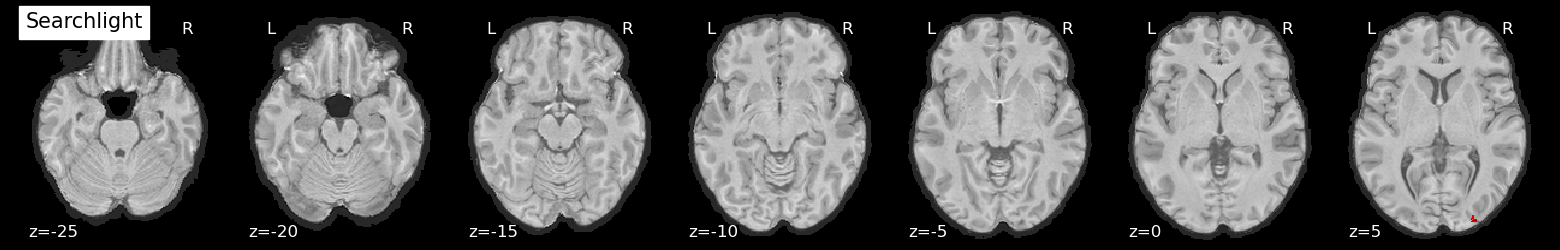

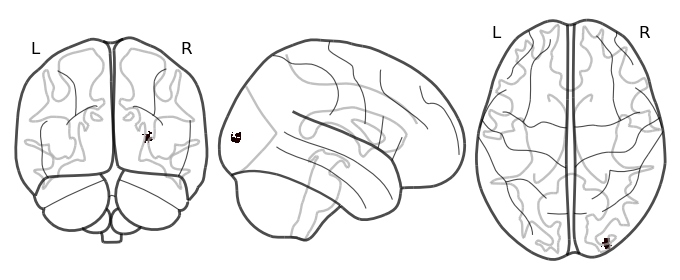

In [42]:
# --------------
from nilearn import image
from nilearn.plotting import plot_stat_map, plot_img, show
from nilearn import plotting
%matplotlib inline
#Create an image of the searchlight scores
searchlight_img = new_img_like(anat_filename, searchlight.scores_)
#Plot the searchlight scores on an anatomical background
plot_img(searchlight_img, bg_img=anat_filename,#bg_img=mean_fmri,
         title="Searchlight", display_mode="z",cut_coords=[-25,-20,-15,-10,-5,0,5],
         vmin=.40, cmap='jet', threshold=cut, black_bg=True)
#plotting.plot_glass_brain effects
plotting.plot_glass_brain(searchlight_img,threshold=cut)

In [35]:
### Make a classification on the 2nd split using the best voxels

In [48]:
from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=process_mask2_img, standardize=False)

# We use masker to retrieve a 2D array ready
# for machine learning with scikit-learn
fmri_masked = masker.fit_transform(fmri_img2)
#Print size of matrix (images x voxels)
print(fmri_masked.shape)


from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(LinearSVC(penalty='l2'), fmri_masked, conditions2, cv=10)
print(cv_score)
print('Mean prediction score:')
print(np.mean(cv_score))

(72, 499)
[0.5        0.75       1.         0.57142857 0.85714286 0.57142857
 0.57142857 0.71428571 0.57142857 0.71428571]
Mean prediction score:
0.682142857142857


### Perform a permutation test

In [49]:
from sklearn.model_selection import permutation_test_score
score, permutation_scores, pvalue= permutation_test_score(
    LinearSVC(penalty='l2'), fmri_masked, conditions2, cv=10, n_permutations=1000, 
    n_jobs=-1, random_state=0, verbose=0, scoring=None)
print("Classification Accuracy: %s (pvalue : %s)" % (score, pvalue))

Classification Accuracy: 0.682142857142857 (pvalue : 0.005994005994005994)


### View a histogram of permutation scores

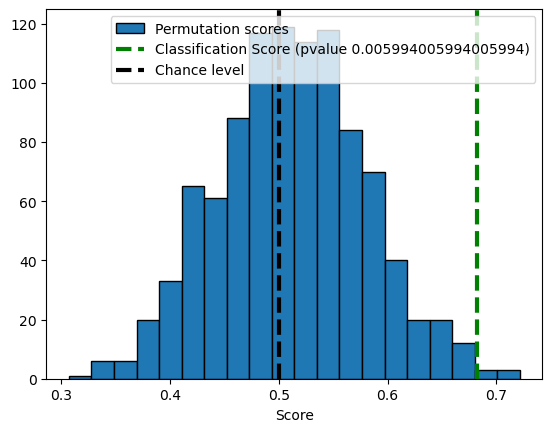

In [50]:
import numpy as np
import matplotlib.pyplot as plt
#How many classes
n_classes = np.unique(conditions2).size

plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.plot(2 * [1. / n_classes], ylim, '--k', linewidth=3, label='Chance level')

plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')
plt.show()